# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
validation_file= "valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = train['features'].shape[0]

# TODO: Number of testing examples.
n_test = valid['features'].shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = train['features'].shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(train['labels'])

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 42


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

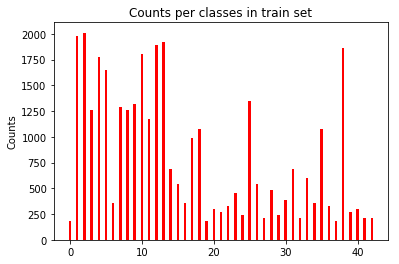

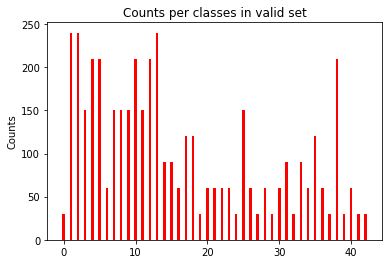

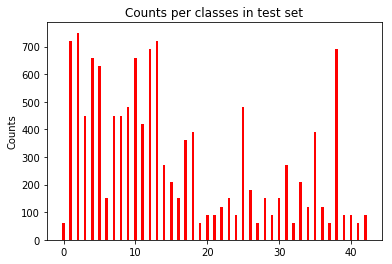

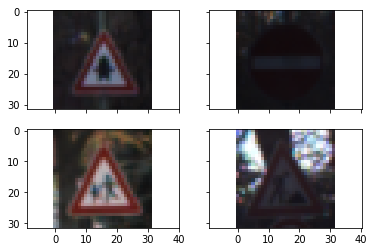

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

# Visualize distribution of labels
train['labels']
def plot_ClassDistribution(labels,set_name):
    values, counts = np.unique(labels, return_counts=True)
    width = 0.35       # the width of the bars
    f, distrib = plt.subplots()
    rects1 = distrib.bar(values, counts, width, color='r')
    distrib.set_ylabel('Counts')
    distrib.set_title('Counts per classes in '+set_name +' set')
    plt.show()

plot_ClassDistribution(train['labels'],'train')
plot_ClassDistribution(valid['labels'],'valid')
plot_ClassDistribution(test['labels'],'test')

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.imshow(train['features'][np.random.randint(0,n_train)])
ax2.imshow(train['features'][np.random.randint(0,n_train)])
ax3.imshow(train['features'][np.random.randint(0,n_train)])
ax4.imshow(train['features'][np.random.randint(0,n_train)])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Interestingly enough because counter intuitive at first, in his paper, Yann Lecun mentions that the color information didn't improve the performance vs Grayscale, which is very interesting to reduce the number of parameters (input depth becomes 1 instead of 3).
On the top of that, some random transformations are added for data augmentation, which shall help to prevent overfit and get better results on the test set.
Finally, standardization is applied to make sure all images are on the same scale, this will help the weights to treat the same range of data and hence be better optimized.

In [6]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
import tensorflow as tf
def preproc_img_tensor(in_images):
    # Grayscale
    distorted_images = tf.image.rgb_to_grayscale(in_images)
    
    ''' Note: need to use a lambda to apply operation on each elements of the batch for the following functions '''
    # Add some random transformations for data augmentation: helps preventing overfit
    #distorted_images = tf.map_fn(lambda img: tf.image.random_flip_left_right(img), gray_imges)
    #distorted_images = tf.map_fn(lambda img: tf.image.random_brightness(img,max_delta=63), distorted_images)
    #distorted_images = tf.map_fn(lambda img: tf.image.random_contrast(img,lower=0.2, upper=1.8), distorted_images)
    
    # Normalize
    result = tf.map_fn(lambda img: tf.image.per_image_standardization(img), distorted_images)

    return result

## Schuffle the data to improve training
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### Model Architecture

For this project, the historical LeNet network from the lab was choosen as a reference for image classification. One critical change was made to apply agressive dropout : whitout this change, the model will not continue learning after a few epochs, peaking at about 80% performance and then having this score decreasing if training is continued !

But after a few trials on trainig, it was found that this architecture will not exceed 92% accuracy on validation set and only 90% on test set.

There are now outperforming competitors to this model to be tried as well, based on the last years results of the image challenge.

In [8]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    feat_number = 16
    '''
        Reminder for filter calculations (P = 0 when using VALID):
            new_height = (input_height - filter_height + 2 * P)/S + 1
            new_width = (input_width - filter_width + 2 * P)/S + 1

    '''
    #
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    # x = tf.placeholder(tf.float32, (None, 32, 32, 1))
    Conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma)) # (height, width, input_depth, output_depth)
    Conv1_B = tf.Variable(tf.zeros(6))
    strides = [1, 1, 1, 1] # (batch, height, width, depth)
    padding = 'VALID'
    logits = tf.nn.conv2d(x, Conv1_W, strides, padding) + Conv1_B

    # Activation.
    logits = tf.nn.relu(logits)
    #logits = tf.nn.dropout(logits, keep_prob)
    print('Conv1:' + str(logits.get_shape()))

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    filter_shape = [1, 2, 2, 1]
    strides = [1, 2, 2, 1]
    padding = 'VALID'
    logits = tf.nn.max_pool(logits, filter_shape, strides, padding)
    print('Pooling:' + str(logits.get_shape()))
    
    # norm1 
    #logits = tf.nn.lrn(logits, 4, bias=1.0, alpha=0.001 / 9.0, beta=0.75,name='norm1')
    
    # Layer 2: Convolutional. Output = 10x10xfeat_number.
    Conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, feat_number), mean = mu, stddev = sigma)) # (height, width, input_depth, output_depth)
    Conv2_B = tf.Variable(tf.zeros(feat_number))
    strides = [1, 1, 1, 1] # (batch, height, width, depth)
    padding = 'VALID'
    logits = tf.nn.conv2d(logits, Conv2_W, strides, padding) + Conv2_B
    print('Conv2:' + str(logits.get_shape()))
    
    # Activation.
    logits = tf.nn.relu(logits)
    
    # Pooling. Input = 10x10xfeat_number. Output = 5x5xfeat_number.
    filter_shape = [1, 1, 1, 1]
    strides = [1, 2, 2, 1]
    padding = 'VALID'
    logits = tf.nn.max_pool(logits, filter_shape, strides, padding)
    print('Pooling:' + str(logits.get_shape()))
    
    # norm2 
    #logits = tf.nn.lrn(logits, 4, bias=1.0, alpha=0.001 / 9.0, beta=0.75,name='norm2')

    # Flatten. Input = 5x5xfeat_number. Output = 5*5*feat_number.
    logits = flatten(logits)
    print('Flatten: ' + str(logits.get_shape()))
    
    # Layer 3: Fully Connected. Input = 5x5xfeat_number. Output = 120.
    FC3_W = tf.Variable(tf.truncated_normal(shape=(5*5*feat_number,120), mean = mu, stddev = sigma))
    FC3_B = tf.Variable(tf.zeros(120))
    logits = tf.add(tf.matmul(logits, FC3_W), FC3_B)
    
    # Activation.
    logits = tf.nn.relu(logits)
    logits = tf.nn.dropout(logits, keep_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    FC4_W = tf.Variable(tf.truncated_normal(shape=(120,84)))
    FC4_B = tf.Variable(tf.zeros(84))
    logits = tf.add(tf.matmul(logits, FC4_W), FC4_B)
    
    # Activation.
    logits = tf.nn.relu(logits)
    #logits = tf.nn.dropout(logits, keep_prob)

    # Layer 5: Fully Connected. Input = 84. Output = n_classes for each labels
    FC5_W = tf.Variable(tf.truncated_normal(shape=(84,n_classes)))
    FC5_B = tf.Variable(tf.zeros(42))
    logits = tf.add(tf.matmul(logits, FC5_W), FC5_B)
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [9]:
### Training hyperparamters:
rate = 0.001
EPOCHS = 30
BATCH_SIZE = 256
DROPOUT_PROB = 0.5

In [10]:
### Prepare graph placeholders:
x = tf.placeholder(tf.float32, (None, 32, 32, 3)) 
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

keep_prob = tf.placeholder(tf.float32) # probability to keep units for dropout

In [12]:
### Connect the complete pipeline:

x_proc = preproc_img_tensor(x)
logits = LeNet(x_proc)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Conv1:(?, 28, 28, 6)
Pooling:(?, 14, 14, 6)
Conv2:(?, 10, 10, 16)
Pooling:(?, 5, 5, 16)
Flatten: (?, 400)


In [13]:
### Training
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [14]:
import time

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    # Measure train time :
    start_time = time.time()
    total_duration = 0
    for i in range(EPOCHS):
        epoch_time = time.time()
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : DROPOUT_PROB})
        total_duration += (time.time() - epoch_time)
        avg_epoch_time = total_duration / (i+1)
        remaining_time = (EPOCHS - (i+1))*avg_epoch_time
        train_accuracy = evaluate(X_train, y_train)    
        validation_accuracy = evaluate(X_valid, y_valid)
        
        print("EPOCH {} ...".format(i+1))
        print("Train Accuracy = {:.3f}".format(train_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Average Epoch Duration:" + str(avg_epoch_time))
        print("Expected Remaining Time: " + time.strftime('%H:%M:%S', time.gmtime(remaining_time)))
        
    print('Training Time: ' + str(time.time() - start_time))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
    saver.save(sess, './lenet')
    print("Model saved")

Training...



EPOCH 1 ...
Train Accuracy = 0.127
Validation Accuracy = 0.138
Average Epoch Duration:8.460949420928955
Expected Remaining Time: 00:04:05


EPOCH 2 ...
Train Accuracy = 0.333
Validation Accuracy = 0.327
Average Epoch Duration:6.166145324707031
Expected Remaining Time: 00:02:52


EPOCH 3 ...
Train Accuracy = 0.520
Validation Accuracy = 0.483
Average Epoch Duration:5.42747163772583
Expected Remaining Time: 00:02:26


EPOCH 4 ...
Train Accuracy = 0.649
Validation Accuracy = 0.584
Average Epoch Duration:5.0411059856414795
Expected Remaining Time: 00:02:11


EPOCH 5 ...
Train Accuracy = 0.750
Validation Accuracy = 0.666
Average Epoch Duration:4.825006484985352
Expected Remaining Time: 00:02:00


EPOCH 6 ...
Train Accuracy = 0.823
Validation Accuracy = 0.742
Average Epoch Duration:4.670190334320068
Expected Remaining Time: 00:01:52


EPOCH 7 ...
Train Accuracy = 0.872
Validation Accuracy = 0.795
Average Epoch Duration:4.557265996932983
Expected Remaining Time: 00:01:44


EPOCH 8 ...
Train Accuracy = 0.896
Validation Accuracy = 0.817
Average Epoch Duration:4.472330659627914
Expected Remaining Time: 00:01:38


EPOCH 9 ...
Train Accuracy = 0.918
Validation Accuracy = 0.830
Average Epoch Duration:4.405300166871813
Expected Remaining Time: 00:01:32


EPOCH 10 ...
Train Accuracy = 0.934
Validation Accuracy = 0.853
Average Epoch Duration:4.351541352272034
Expected Remaining Time: 00:01:27


EPOCH 11 ...
Train Accuracy = 0.939
Validation Accuracy = 0.856
Average Epoch Duration:4.313701239499179
Expected Remaining Time: 00:01:21


EPOCH 12 ...
Train Accuracy = 0.944
Validation Accuracy = 0.856
Average Epoch Duration:4.281824886798859
Expected Remaining Time: 00:01:17


EPOCH 13 ...
Train Accuracy = 0.952
Validation Accuracy = 0.868
Average Epoch Duration:4.254491622631367
Expected Remaining Time: 00:01:12


EPOCH 14 ...
Train Accuracy = 0.958
Validation Accuracy = 0.876
Average Epoch Duration:4.232031038829258
Expected Remaining Time: 00:01:07


EPOCH 15 ...
Train Accuracy = 0.964
Validation Accuracy = 0.883
Average Epoch Duration:4.212142594655355
Expected Remaining Time: 00:01:03


EPOCH 16 ...
Train Accuracy = 0.968
Validation Accuracy = 0.886
Average Epoch Duration:4.194117650389671
Expected Remaining Time: 00:00:58


EPOCH 17 ...
Train Accuracy = 0.969
Validation Accuracy = 0.884
Average Epoch Duration:4.179846567266128
Expected Remaining Time: 00:00:54


EPOCH 18 ...
Train Accuracy = 0.971
Validation Accuracy = 0.892
Average Epoch Duration:4.166015346844991
Expected Remaining Time: 00:00:49


EPOCH 19 ...
Train Accuracy = 0.973
Validation Accuracy = 0.893
Average Epoch Duration:4.153947453749807
Expected Remaining Time: 00:00:45


EPOCH 20 ...
Train Accuracy = 0.976
Validation Accuracy = 0.895
Average Epoch Duration:4.142717027664185
Expected Remaining Time: 00:00:41


EPOCH 21 ...
Train Accuracy = 0.979
Validation Accuracy = 0.898
Average Epoch Duration:4.131784541266305
Expected Remaining Time: 00:00:37


EPOCH 22 ...
Train Accuracy = 0.978
Validation Accuracy = 0.897
Average Epoch Duration:4.1219038204713305
Expected Remaining Time: 00:00:32


EPOCH 23 ...
Train Accuracy = 0.980
Validation Accuracy = 0.903
Average Epoch Duration:4.113876404969589
Expected Remaining Time: 00:00:28


EPOCH 24 ...
Train Accuracy = 0.981
Validation Accuracy = 0.904
Average Epoch Duration:4.10627422730128
Expected Remaining Time: 00:00:24


EPOCH 25 ...
Train Accuracy = 0.983
Validation Accuracy = 0.900
Average Epoch Duration:4.099348125457763
Expected Remaining Time: 00:00:20


EPOCH 26 ...
Train Accuracy = 0.985
Validation Accuracy = 0.904
Average Epoch Duration:4.092383641463059
Expected Remaining Time: 00:00:16


EPOCH 27 ...
Train Accuracy = 0.984
Validation Accuracy = 0.908
Average Epoch Duration:4.08553045767325
Expected Remaining Time: 00:00:12


EPOCH 28 ...
Train Accuracy = 0.985
Validation Accuracy = 0.905
Average Epoch Duration:4.079128588948931
Expected Remaining Time: 00:00:08


EPOCH 29 ...
Train Accuracy = 0.986
Validation Accuracy = 0.913
Average Epoch Duration:4.074043347917754
Expected Remaining Time: 00:00:04


EPOCH 30 ...
Train Accuracy = 0.979
Validation Accuracy = 0.902
Average Epoch Duration:4.069793836275736
Expected Remaining Time: 00:00:00
Training Time: 238.02523112297058


Test Accuracy = 0.890
Model saved


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [3]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [4]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [6]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 